In [1]:
# importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

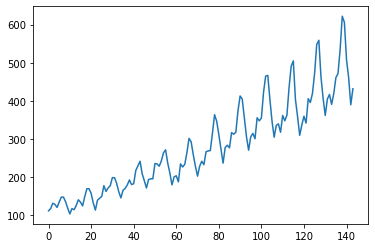

In [2]:
# reading the data to a DataFrame

data = pd.read_csv('SeaPlaneTravel.csv')
data = data['#Passengers']
data.plot()

Clearly data is not stationary. So let's find the value of d by making the data stationary.

In [3]:
# checking dickerfuller test for one level of differencing

adfuller(data.diff().dropna(), autolag='AIC')

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

As we can see that t value is greater than 1% confidence and p value is greater than 0.05, so we have to check for next level for differencing

In [4]:
# checking dickerfuller test for second level of differencing

adfuller(data.diff().diff().dropna(), autolag='AIC')

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275606)

As we can see that t value is significantly lower than 1% confidence and p value is significantly lower than 0.05, so we say that Data is stationary for second level of differencing

C:\Users\MADHAV\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


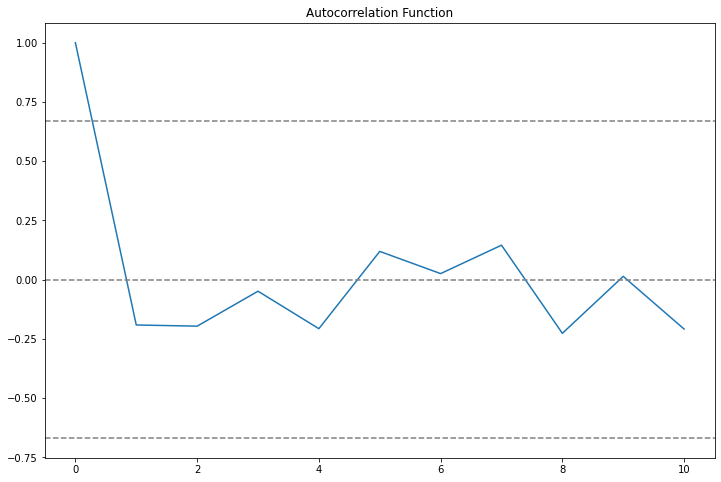

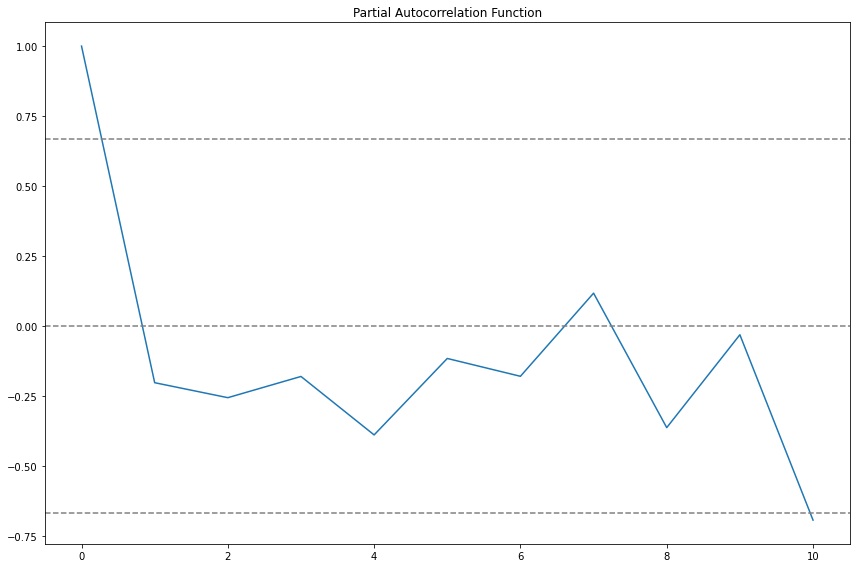

In [5]:
# plotting the ACF and PACF plot for second level differenced data

lag_acf = acf(data.diff().diff().dropna(), nlags=10)
lag_pacf = pacf(data.diff().diff().dropna(), nlags=10, method='ols')

plt.figure(figsize=(12,8))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(data.diff().diff().dropna())),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(data.diff().diff().dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.figure(figsize=(12,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(data.diff().diff().dropna())),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(data.diff().diff().dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From above plots we can take both p = 1 and q = 1

In [6]:
# splitting the data between training and test with 65%-35% split

size = int(len(data)*0.65)
train_data = data[0:size]
test_data = data[size:]

In [7]:
# fitting the ARIMA model on training data

arima= ARIMA(train_data,order=(1,2,1))
model = arima.fit()

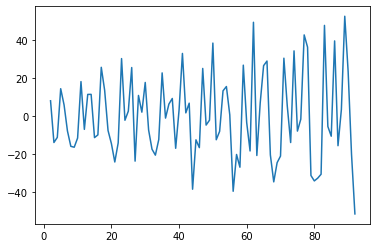

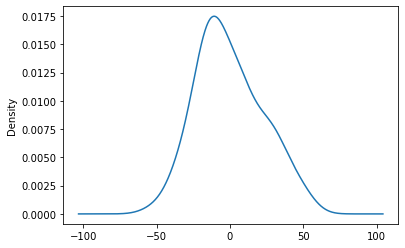

In [8]:
# plotting the residuals

model.resid.plot()
plt.show()
model.resid.plot(kind = 'kde')

In [9]:
model.resid.describe()

count    91.000000
mean     -0.263707
std      22.434403
min     -51.405719
25%     -16.165712
50%      -3.436461
75%      13.892059
max      52.350636
dtype: float64

So Mean of Residuals is bit away from zero for our model.

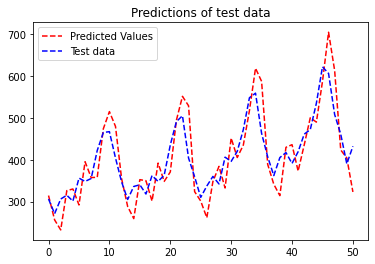

In [10]:
# plotting the predictions for the test data

history = [x for x in train_data]
predictions = []
for i in range(len(test_data)) :
    arima= ARIMA(history,order=(1,2,0))
    model = arima.fit()
    pred = model.forecast()
    history.append(test_data.iloc[i])
    predictions.append(pred[0])
plt.plot(predictions,'r--')
plt.plot(test_data.values,'b--')
plt.title('Predictions of test data')
plt.legend(['Predicted Values','Test data'])

In [11]:
print('MSE of predictions is %.3f'%mean_squared_error(predictions,test_data))

MSE of predictions is 2976.297
